In [1]:
import cv2

frozen_model = 'frozen_inference_graph.pb'
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

model = cv2.dnn_DetectionModel(frozen_model, config_file)

model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) # 255 / 2 = 127.5
model.setInputMean((127.5, 127.5, 127.5)) # mobilenet => [-1, 1]
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7ceff9396490>

In [2]:
classlabels = []
file_name = 'labels.txt'
with open(file_name, 'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

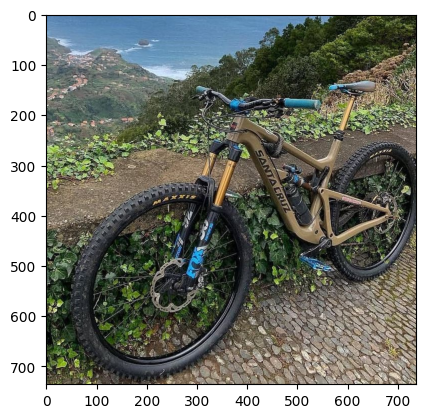

In [5]:
import matplotlib.pyplot as plt

img = cv2.imread('image.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [6]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [7]:
print(confidence)

[0.77238375]


In [8]:
print(bbox) # x, y, w, h

[[ 45 141 681 593]]


In [9]:
print(ClassIndex)

[2]


In [10]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [11]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

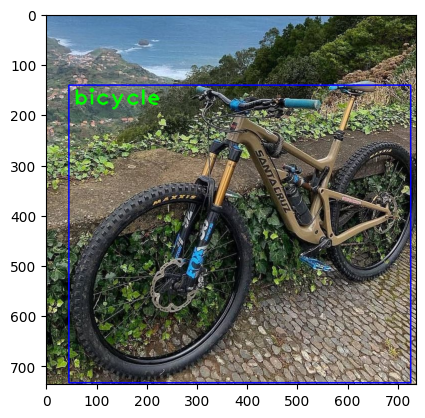

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))